# SubTask4 Bank Marketing


In [35]:
# data manipulation libraries
import pandas as pd                                                    
import numpy as np

# data visualization libraries
import matplotlib.pyplot as plt                                       
import seaborn as sns  

## for detecting Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for handling class imbalance
from imblearn.over_sampling import SMOTE

# for visualising class balanced 
from numpy import where


# Preprocessing libraries
from sklearn.preprocessing import StandardScaler

# for model implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier             # Import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier                      # Import Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier                     # Import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier                     # Import Decision tree classifier
from sklearn.ensemble import RandomForestClassifier                 # Import random forest classifeir  
from sklearn.svm import SVC                                         # Import SVC
from xgboost import XGBClassifier                                   # Import XGBClassifier

# Model selection libraries
from sklearn.model_selection import cross_validate                   # for evaluating estimator performance
from sklearn.model_selection import train_test_split                 # for splitting dataset into train and test
from sklearn.model_selection import GridSearchCV                     # grid search for hyper parameter tuning


!pip install xgboost
from sklearn.metrics import classification_report, confusion_matrix   # Import metrics for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # import metrics for evaluation




# for calculatig values counts in numpy array
from collections import Counter


## Exploratory Data Analysis

In [36]:
def read_dataset():
    df = pd.read_csv('bank-full.csv')                       # read  dataset from csv file into a dataframe
    return df
df = read_dataset()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,yes


##  Attributes and their descriptions

In [37]:
# this function aims to describe data, check data type and checking missing values in entire columns
def understand_data(df):
    print('shape of our dataset is:{}'.format(df.shape))       # get the shape of dataset
    missing_values  = df.isnull().sum()                        # check missing values in entire columns of dataset
    print('missing values in entire columns :\n{}\n'.format(missing_values))
    df_dtype = df.dtypes                                        # get the types of all variables in dataset which has described below
    print('type of all features :\n{}\n\n'.format(df.dtypes))
    df_describe = df.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99,.999]) # for better understanding of distribution of numerical variable
    print('df_describe :\n{}'.format(df_describe))

understand_data(df)
    

shape of our dataset is:(41188, 21)
missing values in entire columns :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

type of all features :
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euri

- categorical variables:


**job:** this is job of the clients which has 12 categories including 'unknown'category.

**mrital:** this is marital status of customers which has three categories ('single' / 'married'/'divorced' including 'unknown' category)

**education:** the level of the education of the customers which has 7 categories including 'unknown'

**default:** it tells whether the customers has credit in default or not.(unpaid credit)with this categories(yes/no/unknown)

**housing:** whether the customers has housing loan or not (yes/no/unknown)

**loan:** wethere the customers has personal loan or not(yes/no/unknown)

**contact:** The method of communication used to contact the customer

**month:** the last month of the year on which the customer was last contacted

**day of week:** the last day of the week contracting to the client

**poutcome:** Outcome of the previous marketing campaign



- numerical features:


**age:** the age of the client

**campaign:** Number of contacts performed during this campaign and for this clien

**previous:** Number of contacts performed before this campaign and for this client

**duration:** The duration of the last contact with the customer in seconds

**pdays:** Number of days that passed by after the client was last contacted from a previous campaign

**emp.var.rate:** employment variation rate

**Cos.price.idx:** Customer price index

**Cons.conf.idx:** Customer confidence index

**Euribor3m:** Euribor 3 month rate 

**Nr.employed:** Number of employees

**y:** Does the client has subscribed or not  with (yes/no)



## split features into categorical and numerical and visualise them 

In [38]:
# this function aims to split categorical features from numerical features for visualising
def split_features(df):
    categorical_feat = []  # define list for both categorical and numerical features
    numerical_feat = []
    for col in df.columns:
        if df[col].dtype == 'object'and col!= 'y':
            categorical_feat.append(col)
        elif df[col].dtype != 'object':
            numerical_feat.append(col)
    return categorical_feat, numerical_feat
categorical_features, numerical_features = split_features(df)
print('categorical_features :{}'.format(categorical_features))
print('numerical_features :{}'.format(numerical_features))


categorical_features :['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features :['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


- the prurpose of the function below is to create cross-tabulations between the target variable 'y', representing subscription outcomes (yes or no), and categorical features.


In [39]:
def cross_tabulation(df):
    
    for i in df[categorical_features]:
        value_counts = pd.crosstab(df[i], df['y'])         # generate cross_tabulation between each categorical feature and target variable                                             
        print(value_counts)
        print('--' * 50) 
cross_tabulation(df)


y                no   yes
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37
----------------------------------------------------------------------------------------------------
y            no   yes
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12
----------------------------------------------------------------------------------------------------
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unkno

## Graphical representation of categorical features

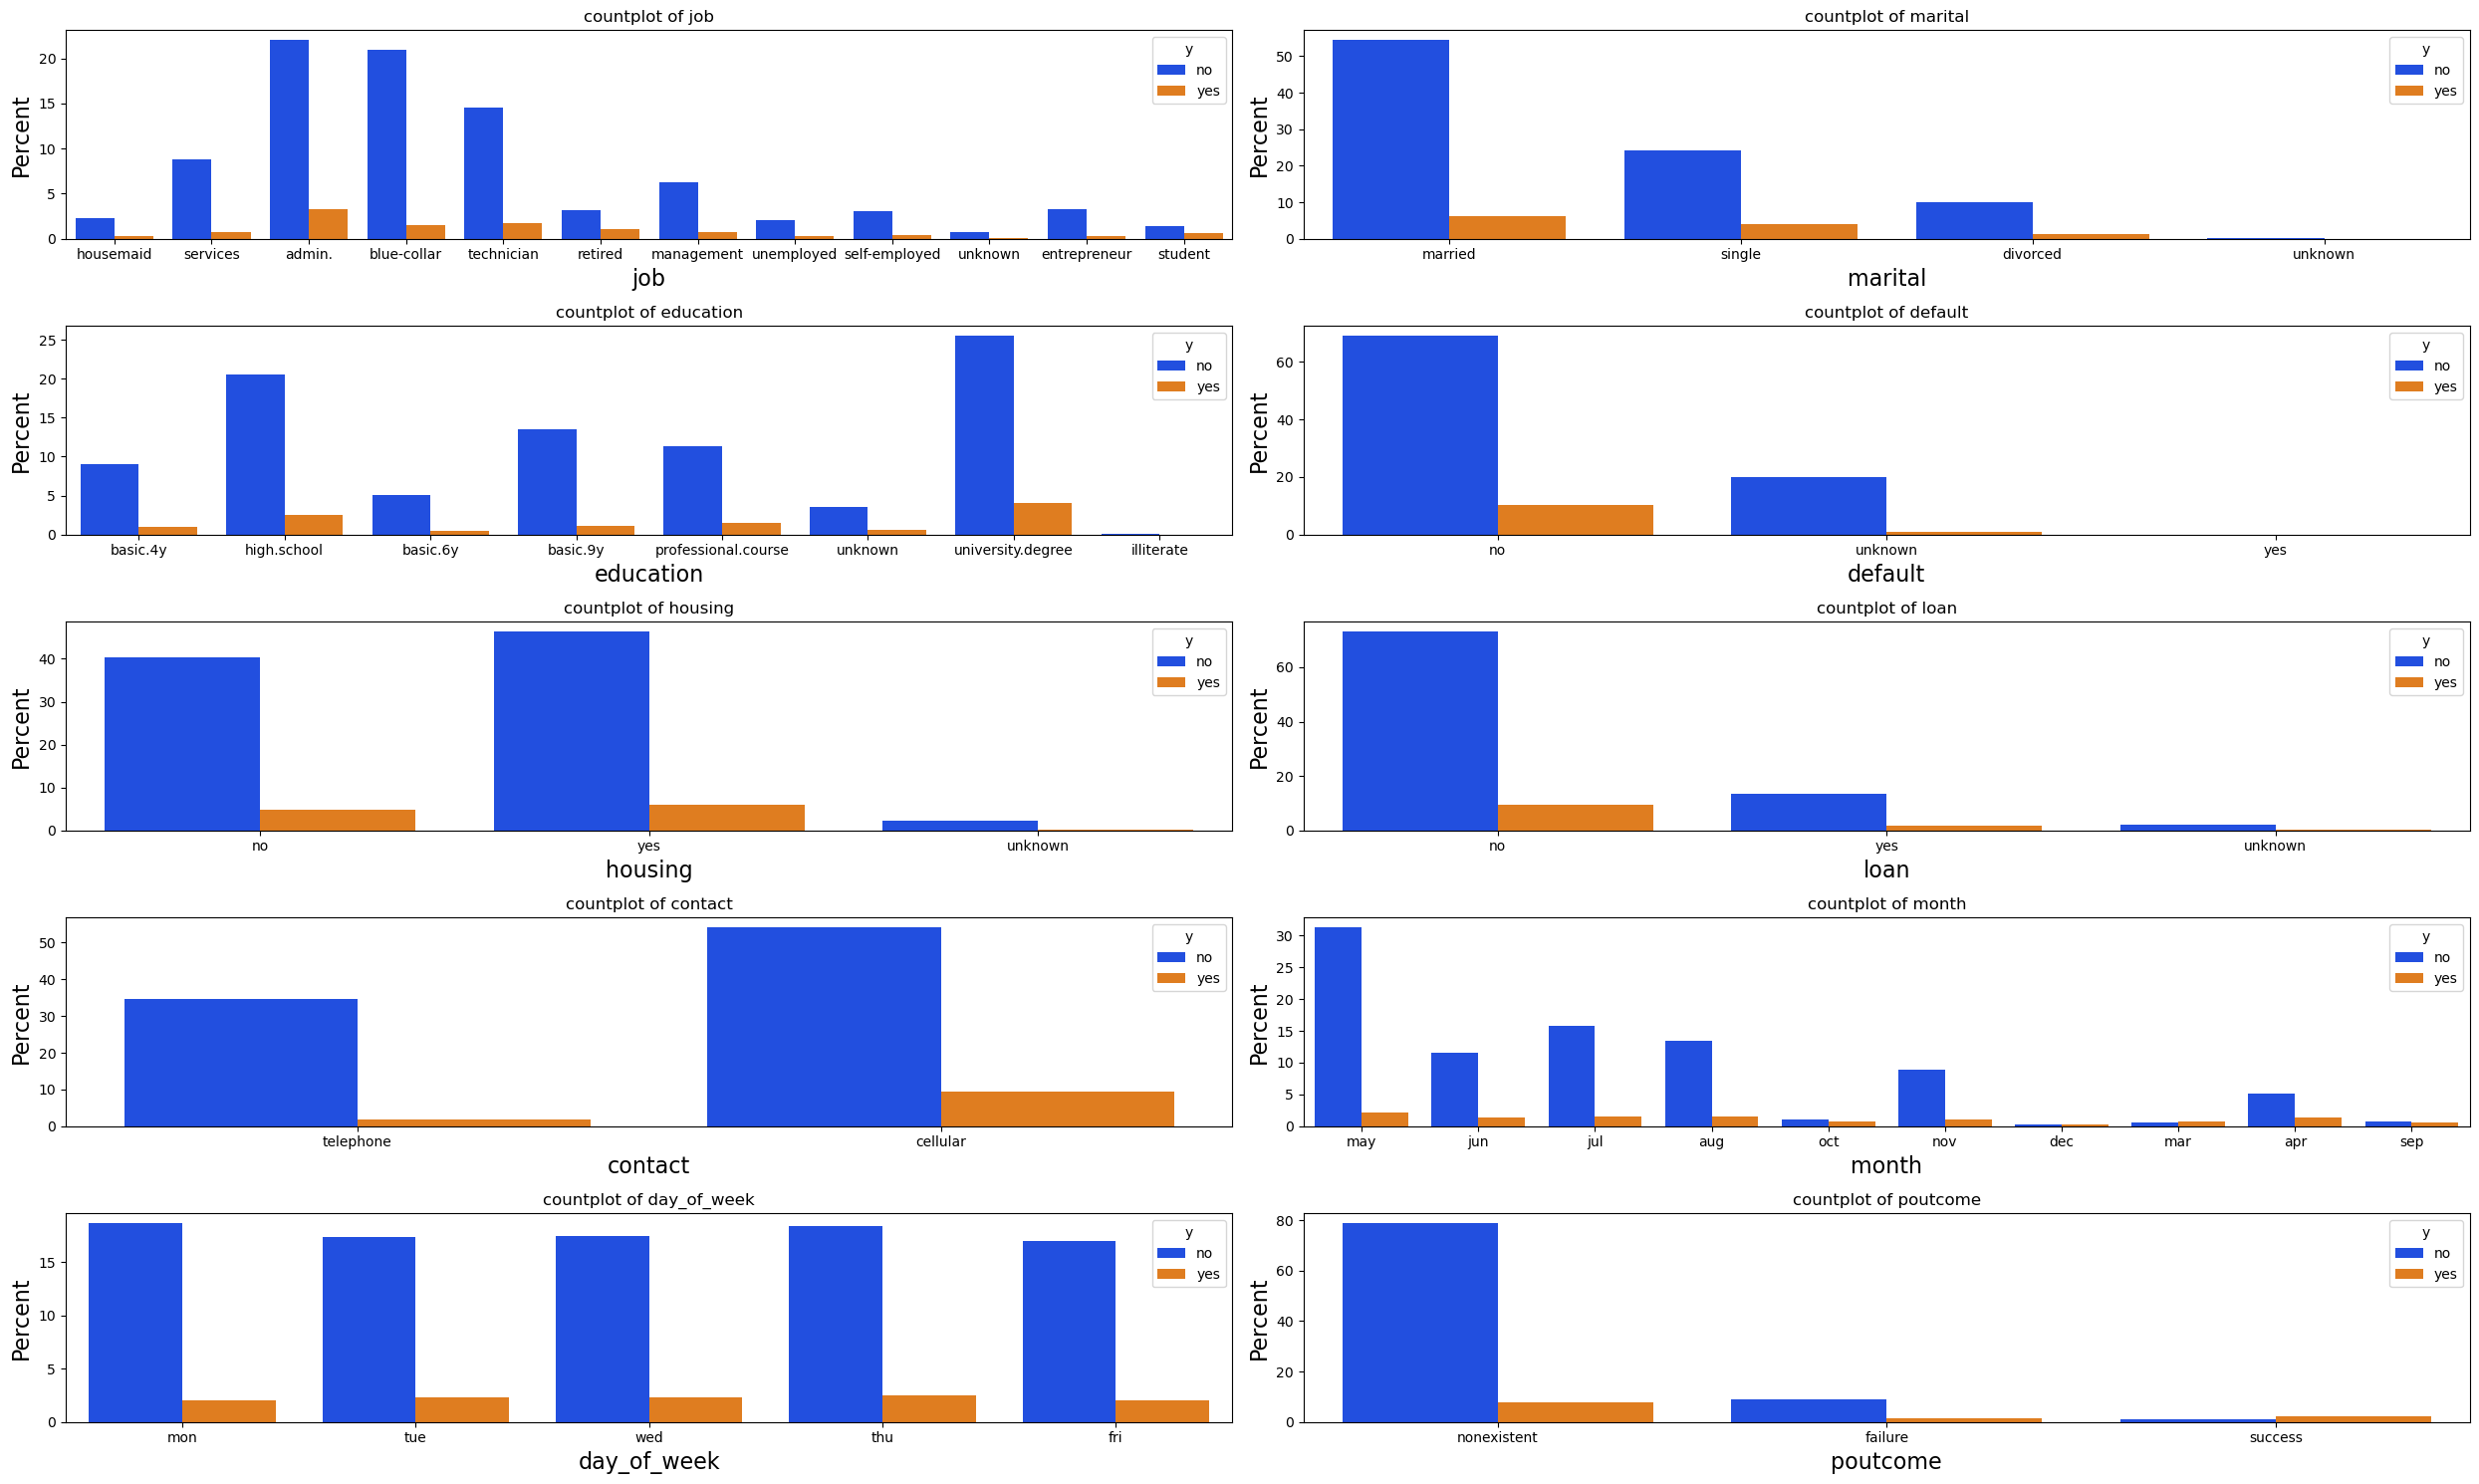

In [40]:
# Just to gain insight from each categorical feature against target variable
def plot_categorical_features(categorical_features):
    
    fig, axes = plt.subplots(5, 2, figsize=(25, 15))  # Create a 5*2 grid of subplots
    axes = axes.ravel()                               # Flatten the 2D array of axes to 1D for easier access
    
    for i, feature in enumerate(categorical_features):
        # Create a countplot for each categorical feature
        # Use axes[i] to specify which subplot to use
        ax = sns.countplot(x=feature, hue=df['y'], data=df, ax=axes[i], stat = 'percent', palette='bright')
        
        # Set the xlabel and ylabel using the current Axes object
        ax.set_xlabel(feature, fontsize=16)
        ax.set_ylabel('Percent', fontsize=16)
        
        # Set the tick parameters for the current Axes object
        ax.tick_params(labelsize=10)
        ax.set_title(f'countplot of {feature}')

    
    plt.tight_layout()  # Adjust subplots to fit in to the figure area.
    plt.show()  
    
plot_categorical_features(categorical_features)


**observation on job category:**
- Based on the visualization of job categories, we can observe that the bank tends to target customers with job roles such as management, blue-collar, technician, admin, and services. On the other hand, customers with job roles such as entrepreneurs, self-employed, unemployed, students, and housemaids are less likely to be targeted by the bank.

- This observation makes sense as job roles such as management, blue-collar, technician, admin, and services are more likely to have a steady income and financial stability, which makes them potential candidates for bank services such as loans, credit cards, and other financial products. On the other hand, job roles such as self-employed, unemployed, and students are less likely to have a steady income, which makes them less likely to be targeted by the bank.

**observation on education category:**

- Based on the visualization of education categories, we can see that the clients with higher education level (high.school, university.degree) acounted for the highest proportion, and the percentage of customers who subscribed to terms deposits is higher in secondary(high.school) and tertiary level(university.degree). this suggest that bank should have more focus on these two categories.

**observation on loan and default category:**

- customers with no credit in default or not having personal loans are more likely to subscribe term deposit compared to ones who are default or loan.


**observation on contact category**:

- customers contacted by cellular, more subscribe to term deposit. 


**observation on day of week category**:

- except on friday in all the days of the week the portion of subscribe to term deposit are quite similar.


**observation on marital category**:

- in marital category, as we can see, the majority of customers are in married status, and most of the clients that subscribe to term deposit are married people. therfore bank should have more focus on married and as the second category, single people.



**observation on housing category:**

- in this category as we can see, clients with housing loan are more likely to subscribe to term deposit compared to people with not having housing loan.

**observation on month category:**

- we can observe that subscription rate is low during the month of october, december, march, september and january.this indicates that bank needs to improve its marketing strategy, and promotion of term deposit subscription to attract more customers.
conversely, in month of may, jun, july, august, november and april customers more likely to subscribe to term deposit.

**observation on poutcome category:**

- In the poutcome column we can see that the sample size of nonexistent is quite large, apart from that, successful previous campaign will lead to higher percentage of customers who accept subscription from term deposit.
  

## Graphical representation of numerical features

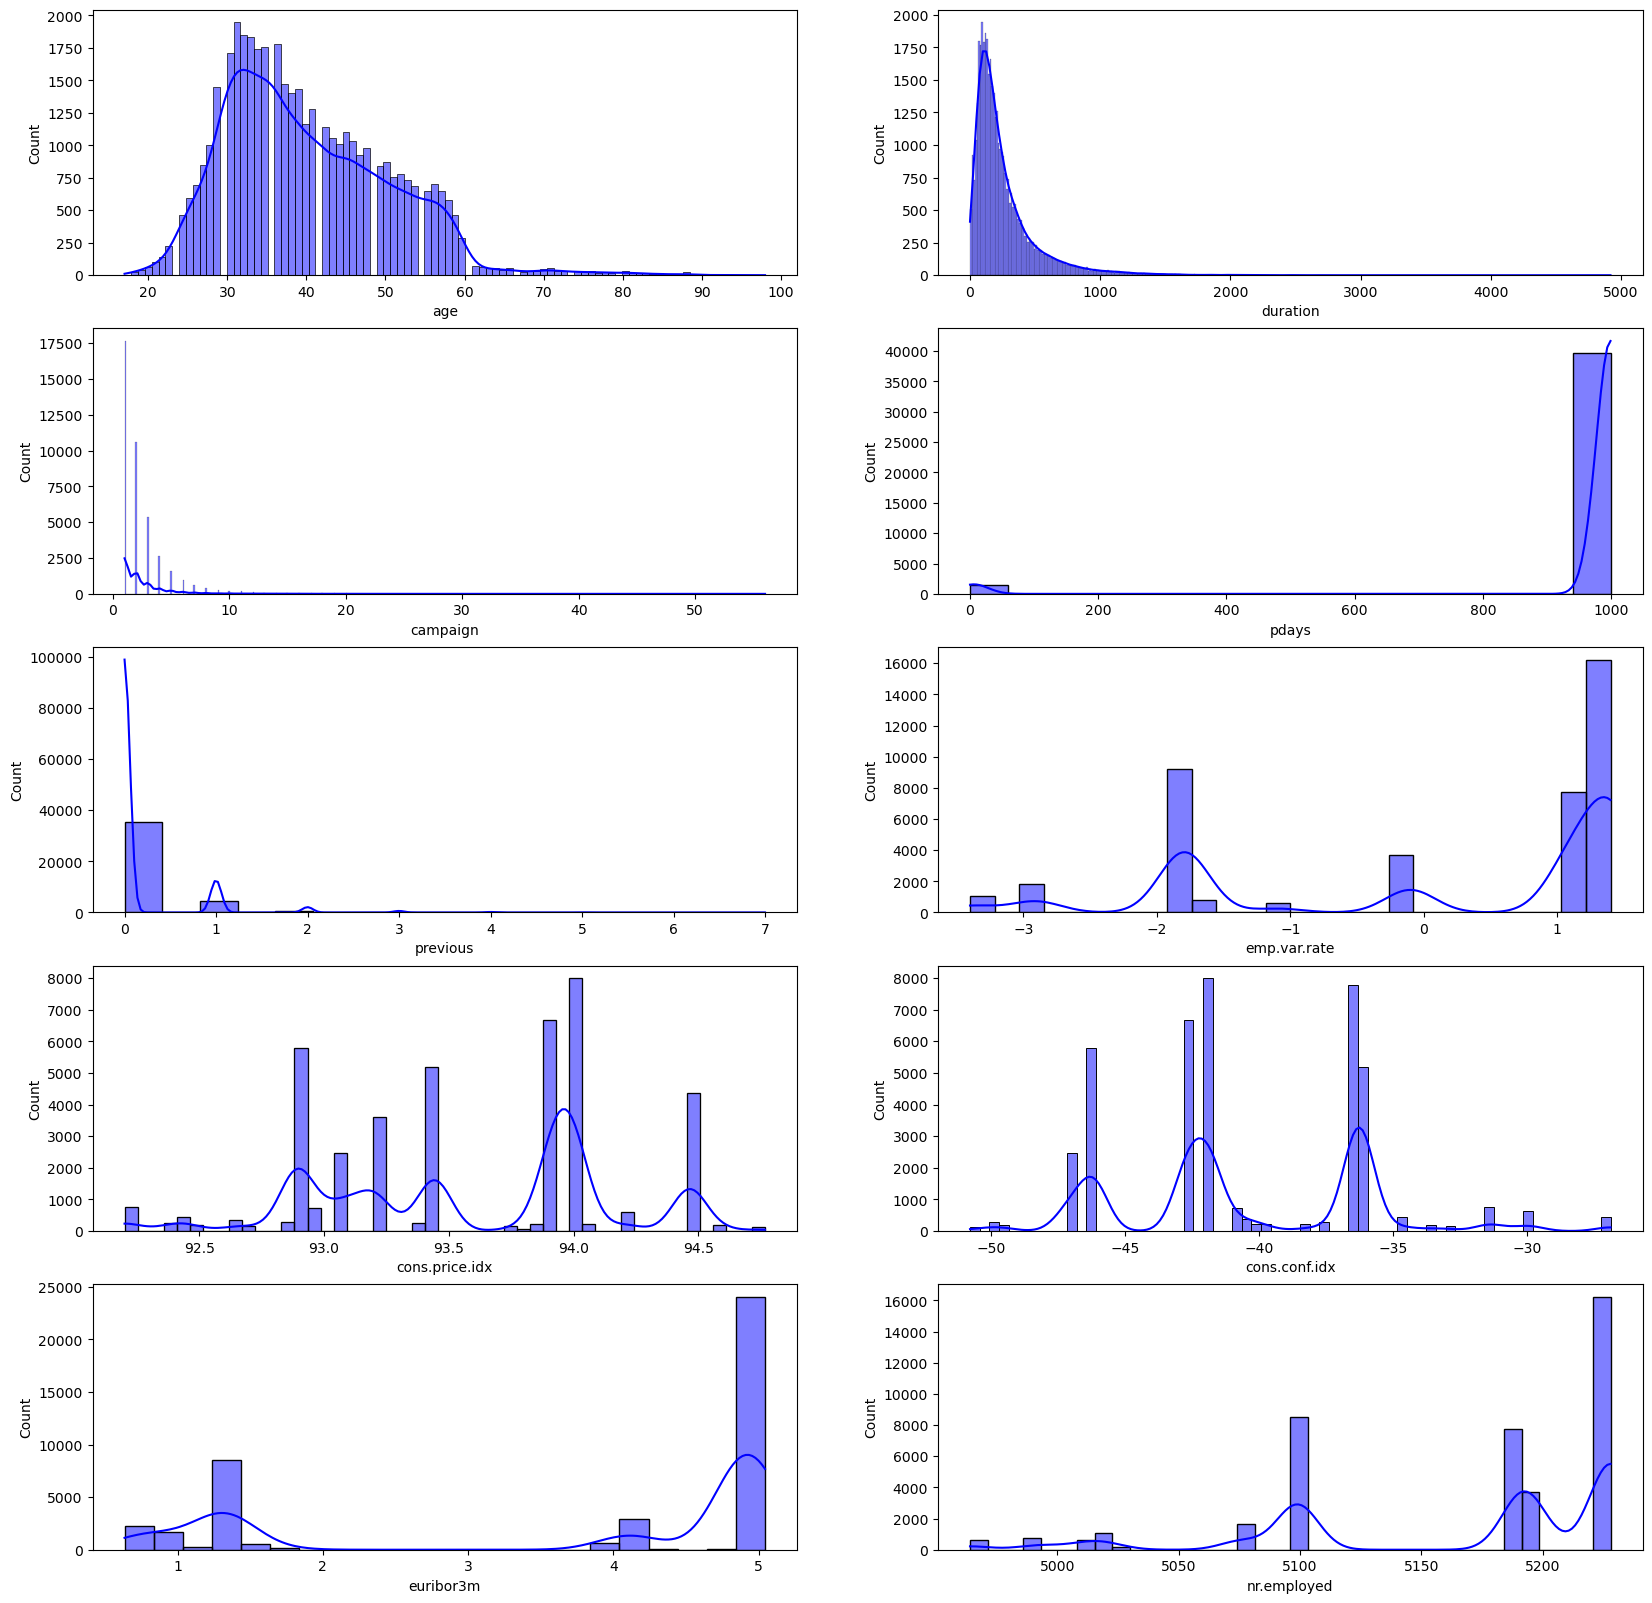

In [41]:
# draw hisplot of numerical eatures to gain insight from the distribution of numerical features
def plot_numerical_features(numerical_features):
    
    plt.figure(figsize=(20,20))
    n=1
    for col in numerical_features:
      ax = plt.subplot(5,2,n)
      sns.histplot(df[col], kde=True, color ='blue') # generate a grid of histograms with kernel density estimates for each numerical feature
      n += 1
    plt.show()

plot_numerical_features(numerical_features)
    

the graph above generally shows the histogram of numerical variable with KDE(Kernel Density Eatimation), which provides a smooth distribution for data.

we decided to describe all numerical features individually to have better understanding these numerical variables in related to term deposit.

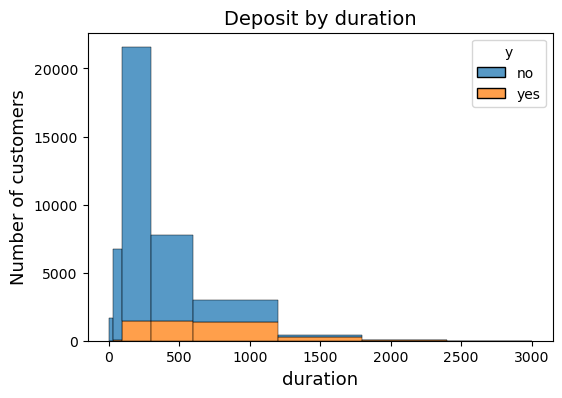

0
4918


In [42]:
plt.figure(figsize=(6, 4))

bins=[-1, 30,90,300,600,1200,1800,2400,3000]

ax = sns.histplot(x = df['duration'].loc[df['duration'] < 3000], hue = df['y'], multiple="stack",bins=bins) #Values greater than or equal to 3000 are excluded from this plot
ax.set_ylabel('Number of customers', fontsize = 13)
ax.set_xlabel('duration', fontsize = 13)
ax.set_title('Deposit by duration', fontsize = 14)
plt.show()
print(df['duration'].min())
print(df['duration'].max())



**observation for duration:**
regarding the numerical attribute 'duration' we can see that there is a tendency that the longer the duration, the higher probabilty of customers decide to subscribe the term deposit, except the duration of over 1000.

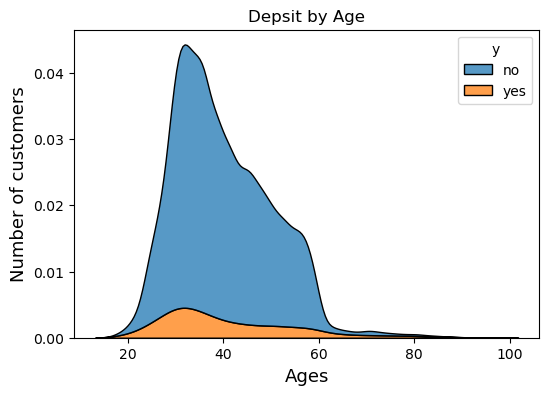

17
98


In [43]:
# plot 
plt.figure(figsize=(6, 4))
age_deposit = sns.kdeplot(data = df, x = 'age', hue = 'y', multiple="stack")
age_deposit.set_ylabel('Number of customers', fontsize = 13)
age_deposit.set_xlabel('Ages', fontsize = 13)
age_deposit.set_title('Depsit by Age', fontsize = 12)
plt.show()
print(df['age'].min())        # minimum age of customers
print(df['age'].max())        # maximum age of customers

**observation on age attribute:**
as we can see the range of customer ages varies between 17 until 98, They are mostly young people, the highest number of customers is in the age of 30.



C:\Users\Zohre\AppData\Local\Temp\ipykernel_16972\2023732359.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=col ,data=df, palette=['blue', 'orange'])
C:\Users\Zohre\AppData\Local\Temp\ipykernel_16972\2023732359.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='y', y=col ,data=df, palette=['blue', 'orange'])


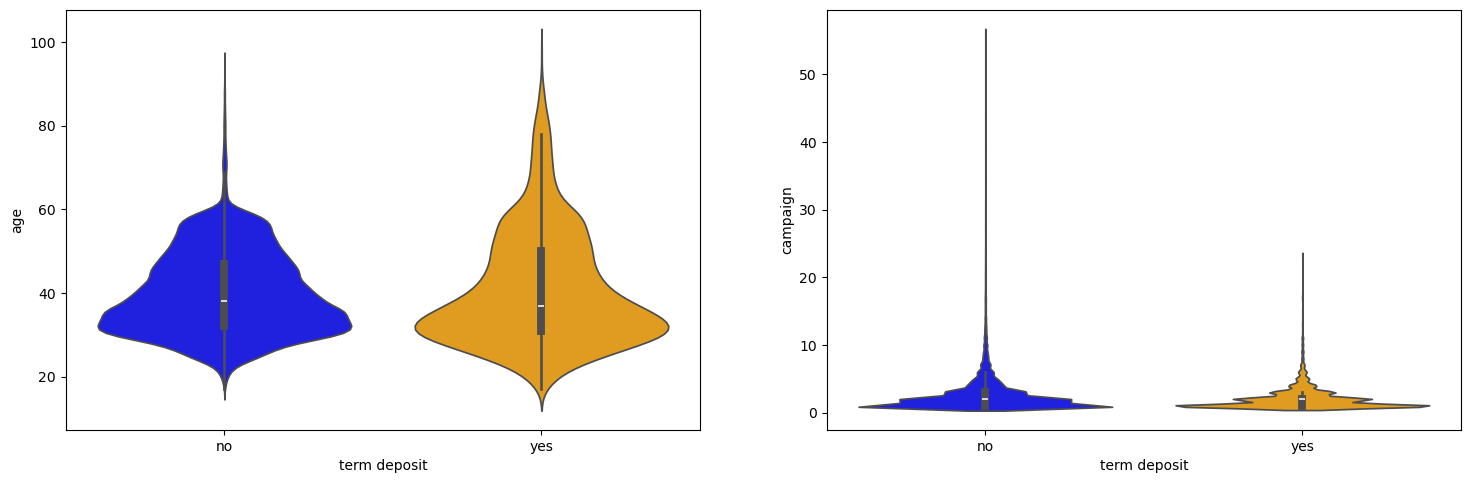

In [44]:
# another plot called violin plot for understand the distibution of 'age' and 'campaign'
columns = ['age','campaign']

plt.figure(figsize=(18,12))
n=1
for col in columns:
  ax = plt.subplot(2,2,n)
  sns.violinplot(x='y', y=col ,data=df, palette=['blue', 'orange'])
  plt.xlabel('term deposit')
  n += 1
plt.show()

-  Each violin plot will represent the distribution of values for the corresponding variable (age and campaign), with different colors indicating the different categories of the target variable.

 
**obsevation of age from violin plot**:

as we can see people in the range of 20-30 have a higher chances of subscribing to term deposit. how ever after 60 also there are people who subscribe.

**observation from campaign violin plot**

from violine plot we can observe that customers were contacted 5 or fewer times during the current campaign are more likely to subscribe to term deposit.


## Distribution of the target variable

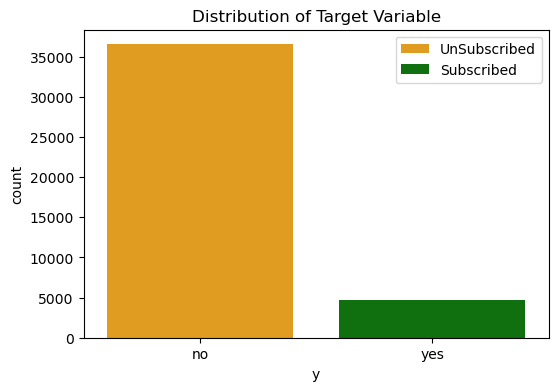

In [45]:
# this function aims to visually repesent the distribution of target variables
def plot_target_distribution(df):
    
    fig, axs = plt.subplots(1, 1, figsize=(6, 4))
    labels = ['UnSubscribed','Subscribed']
      
    ax = sns.countplot(x='y', hue=df['y'], data=df, palette=['orange', 'green'])
    ax.set_title('Distribution of Target Variable')
    
    # Adding legend with custom labels at the top
    plt.legend(labels=['UnSubscribed','Subscribed', ])
    
    plt.show()
        
plot_target_distribution(df)     

- The target column is highly imbalanced, with a low ratio of positive responses (yes) to negative responses (no). This is expected in a marketing campaign, as only a small percentage of the target audience may be interested in the product being offered, such as a term deposit in this case. However, this extreme imbalance should be accounted for when building predictive models to ensure accurate results.

In [46]:
 # this function aims to replace'yes' and 'no' with 1 and 0 for target variable, which should be considered for analysing. 
def convert_categorical_target_to_numerical(df):
    df['y'].replace({'no': 0, 'yes': 1}, inplace=True)  #replace yes or no with 1 and 0 in target variable column
    return df
df = convert_categorical_target_to_numerical(df)
df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1


## Handling 'unknown' category in some categorical features

In [47]:
## Handling unknown category in categorical features
def handle_unknown_categories(df):
    
    categorical_columns_with_unknown = [col for col in df.columns if df[col].dtype == 'object' and 'unknown' in df[col].unique()]
    print('categorical_columns_with_unknown : {}'.format(categorical_columns_with_unknown))

    # Step 2: Calculate mode for each categorical column
    mode_values = df[categorical_columns_with_unknown].mode().iloc[0] # calculating the mode values for each categorical attributes which have 'unknown' in them
    # print(mode_values)
    
    # Step 3: Replace "unknown" values with mode values
    for col in categorical_columns_with_unknown:
        df[col] = df[col].replace('unknown', mode_values[col]) # replace 'unknown' category with the mode of attribute in each categorical column
    return df

df = handle_unknown_categories(df)

df

categorical_columns_with_unknown : ['job', 'marital', 'education', 'default', 'housing', 'loan']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4964,1


- the function above tries to  handle missing attribute values that are labeled as "unknown" in categorical attributes. It implements a completion imputation technique where missing values are replaced with Mode of respective attribute.


- This approach helps to ensure that the missing values are filled with reasonable estimates that preserve the distribution of the data and minimize the impact of missingness on subsequent analyses. By imputing missing values with the mode or mean, we maintain the integrity of the dataset and allow for more robust analysis and modeling **(Tekouabou, Cherif, & Silkan, 2019)**.

## Encoding Different Categorical Features 

- we have different categorical features :**Nominal Features, Boolean Features, and Ordinal Features**, which will be handled separetly in different functions **(Tekouabou, Cherif, & Silkan, 2019)**.
 
**Nominal Features:**

- nominal features are unordered categorical features. when the influence of categories were not different each other.
like 'job', 'marital', 'contact', 'month', and 'day of week'.if an un ordered categorical features have n categories, n-1 dummy variables were requied. because those n-1 dummy variables can describe the feature **(Jin & He, 2019)**. for example when the married, single, and divorced status are all zero, it means the status is unknown so those three attributes can describe unknown category even if we do not have category 'unknown'.

as a result in the coding we use drop_first = true to prevent multicollinearity in dataset **(Jin & He, 2019)**.



In [48]:
# this function aim to handle encoding of nominal features with one-hot-encoding in pandas library

def one_hot_encoding_nominal_features(df):
    
     #get dummy variables (one-hot encodings from panda library) for the nominal categorical features
    marital = pd.get_dummies(df['marital'], prefix = 'marital', dummy_na=False, drop_first=True).astype(int) 
    contact = pd.get_dummies(df['contact'], prefix = 'contact', dummy_na=False, drop_first=True).astype(int)
    month = pd.get_dummies(df['month'], prefix = 'month', dummy_na=False, drop_first=True).astype(int)
    day_of_week = pd.get_dummies(df['day_of_week'], prefix = 'day_of_week', dummy_na=False, drop_first=True).astype(int)
    poutcome = pd.get_dummies(df['poutcome'], prefix = 'poutcome', dummy_na=False, drop_first=True).astype(int)
    job = pd.get_dummies(df['job'], prefix = 'job', dummy_na=False, drop_first=True).astype(int)
    

     # Concatenate the original DataFrame with the new 'dummy' variables
    df_new = pd.concat([df, marital, contact, month, day_of_week, poutcome, job], axis = 1)
    
    
    # dropping original column, because we made dummay variables from them
    df_new.drop(columns=['marital','contact','month', 'day_of_week','poutcome', 'job'], axis=1, inplace=True)
    
    return df_new
    
df_new = one_hot_encoding_nominal_features(df)
df_new


,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,basic.4y,no,no,no,261,1,999,0,1.1,...,0,0,1,0,0,0,0,0,0,0
1,57,high.school,no,no,no,149,1,999,0,1.1,...,0,0,0,0,0,0,1,0,0,0
2,37,high.school,no,yes,no,226,1,999,0,1.1,...,0,0,0,0,0,0,1,0,0,0
3,40,basic.6y,no,no,no,151,1,999,0,1.1,...,0,0,0,0,0,0,0,0,0,0
4,56,high.school,no,no,yes,307,1,999,0,1.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,professional.course,no,yes,no,334,1,999,0,-1.1,...,0,0,0,0,1,0,0,0,0,0
41184,46,professional.course,no,no,no,383,1,999,0,-1.1,...,1,0,0,0,0,0,0,0,0,0
41185,56,university.degree,no,yes,no,189,2,999,0,-1.1,...,0,0,0,0,1,0,0,0,0,0
41186,44,professional.course,no,no,no,442,1,999,0,-1.1,...,0,0,0,0,0,0,0,0,1,0


**Bionomial Features(Boolean features):**

There were 2 categories value in some features, such as default, housing, and loan . The two different categorical value could be code with 0 and 1 **(Jin & He, 2019)**.


**Ordinal Features:**

attribute 'education' considered to be ordinal feature **(Jin & He, 2019)**. so we assign numbers from 0 to 6 to each categories of education.



In [49]:
def preprocessing_bionomial_ordinal_features(df):
    
        
     # encoding ordinal feature which is : Education
    education_encoding = {'unknown': 0, 'illiterate': 1, 'basic.4y': 2, 'basic.6y': 3, 'basic.9y': 4,
                         'high.school': 5, 'professional.course': 6, 'university.degree': 7}
    df['education'] = df['education'].replace(education_encoding)
    
   
    # For Boolean features: replace 'yes' with 1 and 'no' with 0
    boolean_features = ['default', 'housing', 'loan']
    for feature in boolean_features:
        df[feature] = df[feature].replace({'yes': 1, 'no': 0})

    
    return df

df_final = preprocessing_bionomial_ordinal_features(df_new)

df_final
   

,age,education,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,2,0,0,0,261,1,999,0,1.1,...,0,0,1,0,0,0,0,0,0,0
1,57,5,0,0,0,149,1,999,0,1.1,...,0,0,0,0,0,0,1,0,0,0
2,37,5,0,1,0,226,1,999,0,1.1,...,0,0,0,0,0,0,1,0,0,0
3,40,3,0,0,0,151,1,999,0,1.1,...,0,0,0,0,0,0,0,0,0,0
4,56,5,0,0,1,307,1,999,0,1.1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,0,1,0,334,1,999,0,-1.1,...,0,0,0,0,1,0,0,0,0,0
41184,46,6,0,0,0,383,1,999,0,-1.1,...,1,0,0,0,0,0,0,0,0,0
41185,56,7,0,1,0,189,2,999,0,-1.1,...,0,0,0,0,1,0,0,0,0,0
41186,44,6,0,0,0,442,1,999,0,-1.1,...,0,0,0,0,0,0,0,0,1,0


- As a next step we want to calculate correlation matrix to see what is the correlation btween different with themselves and also correlation between 
features and target variables **(Sundus et al., 2022)**.

## Calculating Correlation Matrix

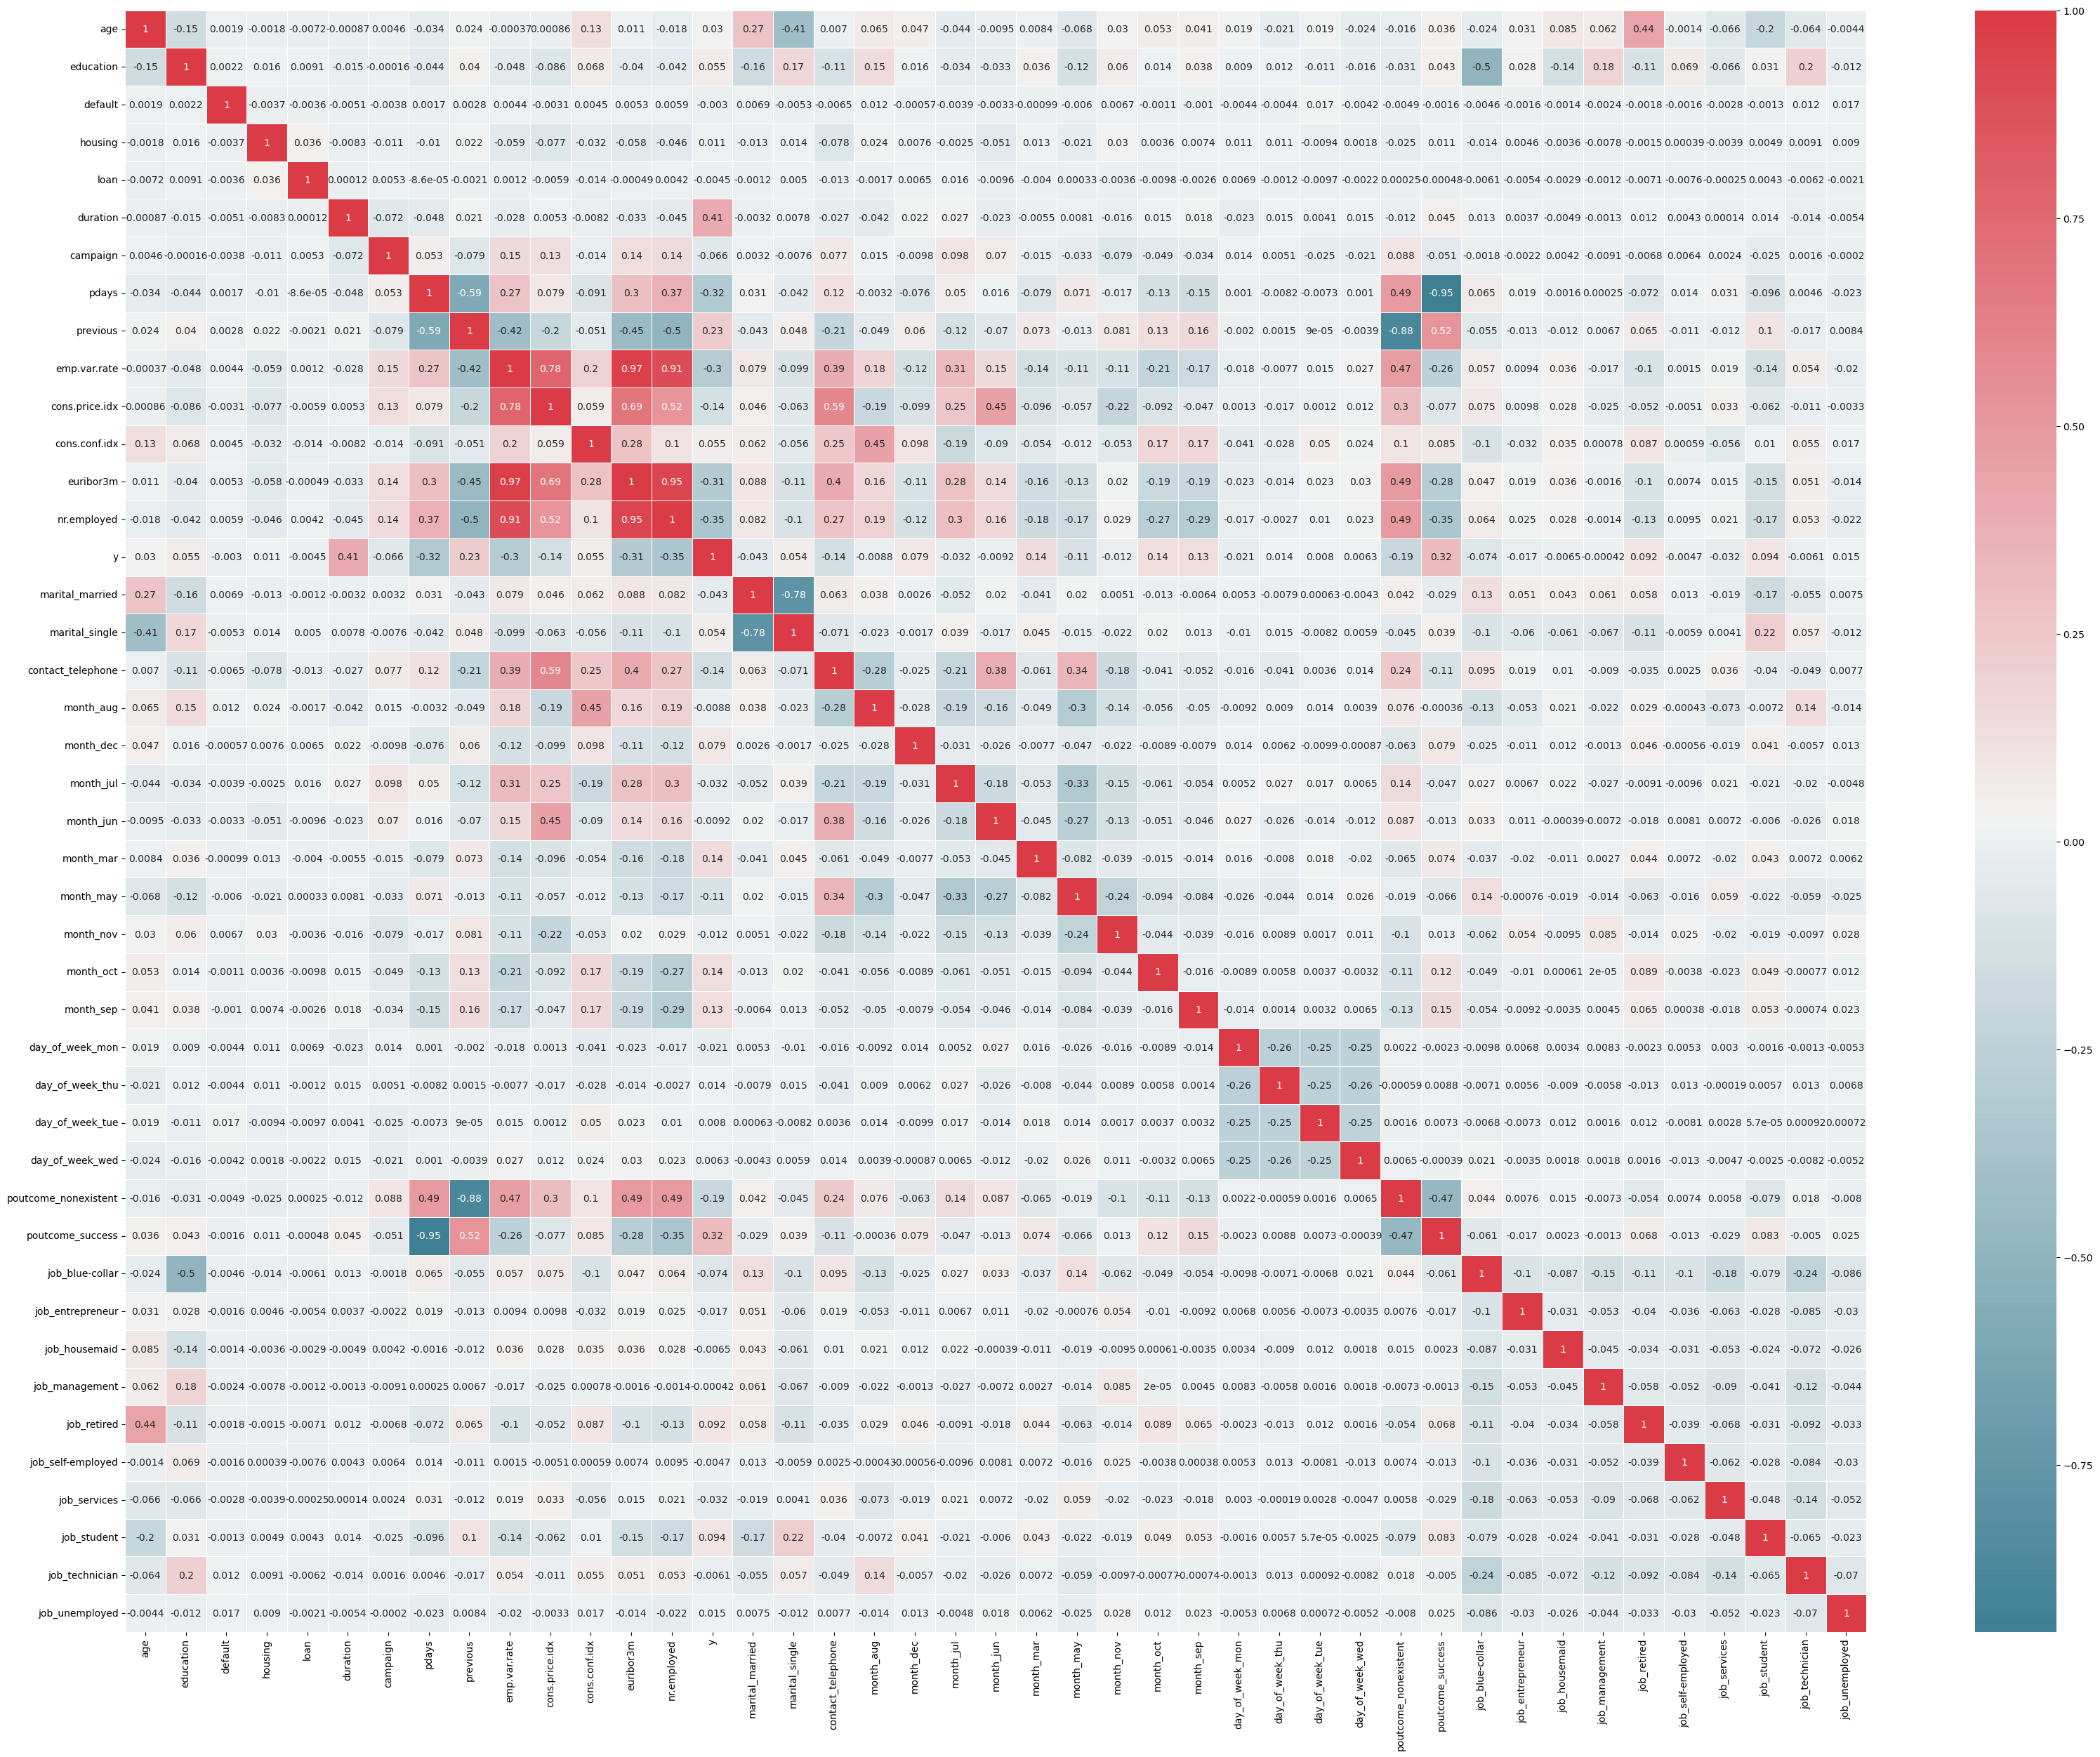

In [50]:
# build correlation matrix 
import seaborn as sns

def correlation_matrix(df):
    
    
    fig, ax = plt.subplots(figsize = (40, 30))
    df_corr = df.corr()
    
    # plotting a triangular correlation heatmap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(df_corr, annot=True, cmap = cmap, linewidth = 0.7)
    plt.show()
correlation_matrix(df_final)

- Upon reviewing the correlation matrix, we observed significant correlations among certain features, before delve deeper into correlation matrix, we first split and normalize  our data, then try to calculate VIF scores (**Variance Inflation Factor (VIF)**) to check mutlicollinearity. 

In [51]:
y = df_final['y']                   #split df_final to X and y
X = df_final.drop('y', axis = 1)
print(X.shape)

(41188, 42)


## Normalization and Split dataset to Train and Test

In [52]:
#split dataset into train and test
def split_normalize_data(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
    
    y_train = (y_train - y_train.min())/(y_train.max() - y_train.min())  
    y_test = (y_test - y_test.min())/(y_test.max() - y_test.min())

    scaler = StandardScaler()  #initialise scaler
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    df_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns) # convert x_train_scaled to dataframe
    df_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)    # convert x_tst_scaled to dataframe
    
    # Reset the index of y_train to match df_train_scaled
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop = True)
   
    return df_train_scaled, df_test_scaled, y_train, y_test


X_train_scaled, X_test_scaled, y_train, y_test = split_normalize_data(X, y)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
# print(y_train.value_counts())
# print(y_test.value_counts())


(30891, 42)
(10297, 42)


## Calculating VIF Score to check Multicollinearity

In [53]:
# Function to calculate VIF scores for x_train
def calculate_vif(X):
    # Create a DataFrame to store the VIF scores
    vif_data = pd.DataFrame()  # build dataframe from vif_data
    vif_data["Feature"] = X.columns  # make a column in dataframe calling Feature

    # Calculate VIF scores for each feature
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  # calculate VIF score for features

    return vif_data

# Call the function to calculate VIF scores for x_train
vif_scores = calculate_vif(X_train_scaled)
vif_scores


,Feature,VIF
0,age,1.596545
1,education,1.619274
2,default,1.001533
3,housing,1.011740
4,loan,1.003348
5,duration,1.018085
6,campaign,1.047602
7,pdays,11.710651
8,previous,5.869341
9,emp.var.rate,241.215564


As we can see from the VIF dataframe, there are some features that have extremely high vif score which should be exclued from the model, otherwise:

1- the model may become unstable

2- Interpretation of the model becomes more challenging, as the effect of each feature on the target variable may be distorted due to the high
multicollinearity **(Sundus et al., 2022)**.

The VIF scores revealed that five features 'euribor3m', 'emp.var.rate', and 'nr.employed', and 'pdays', 'cons.price.idx', have extremely high correaltion.

from the correlation matrix 'euribor3m and 'emp.var.rate' have correlation  more than 90% , which means one of them is enough for describing target variable and one is considered redundant.

'emp.var.rate' and 'nr.employed' have also high correlation , similarly, 'euribor3m' and 'nr.employed' have high correlation.
with excluding 'euribor3m', 'emp.var.rate', 'pdays', and 'cons.price.idx' from the model we can ensure there is no redundancy between features that have negative effect on our model performance .

- from the vif score and correlation matrix we can see that 'pdays' and 'poutcome_success' also have high correlation, and because 'pdays' is Number of days that passed by after the client was last contacted from a previous campaign, and for new client, this feature is not defined, this can justify that we remove that from the model.




## Excluding redundant features from the model

In [54]:
# this function aim to drop features because of multicollinearity we discussed in previous step
def exclude_features(X_train, X_test):
    
    features_to_drop = ['pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m']  # features we want to drop based on our analysis and because of redundancy
    
    X_train = X_train.drop(features_to_drop, axis = 1)
    X_test = X_test.drop(features_to_drop, axis = 1)
    print(X_train.shape)
    print(X_test.shape)
    return X_train, X_test
    
X_train_scaled, X_test_scaled = exclude_features(X_train_scaled, X_test_scaled)


(30891, 38)
(10297, 38)


## Decide on employ SMOTE for Balancing

- The next step is balancing the dataset. we decided to use SMOTE for balancing the dataset **(He and Garcia 2009)**. By incorporating SMOTE, we aimed to address any potential biases in the model towards the majority class, which could impede the accurate detection of minority instances.
- Applying SMOTE only to the training data avoided overfitting and information leakage, improving the robustness of bank marketing prediction model.

## Handling Class Imbalance Using SMOTE 

In [55]:
# define function to balance our X-train and y_train
def balance_smote(X_train, y_train):
     
    
     smote = SMOTE(sampling_strategy = 'auto', k_neighbors= 4, random_state = 42) # set default parameters for smote
   
     X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)    # Apply SMOTE to the training data only 
     return X_train_balanced, y_train_balanced
     
X_train_smote, y_train_smote = balance_smote(X_train_scaled, y_train)
print(X_train_smote.shape)
print(y_train_smote.shape)


(54822, 38)
(54822,)


## Distribution of Target Variable after Balancing

- we also tried to show the distribution of target variable after handling the imbalance issue which can be shown below:

C:\Users\Zohre\AppData\Local\Temp\ipykernel_16972\332897776.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette=['orange', 'green'])


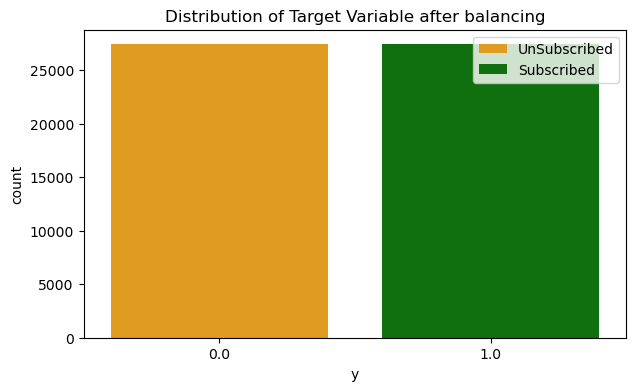

In [56]:
# get the target distribution after balancing with smote technique
def plot_target_distribution(y):
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 4))
    labels = ['UnSubscribed','Subscribed']
      
    ax = sns.countplot(x=y, palette=['orange', 'green'])
    ax.set_title('Distribution of Target Variable after balancing')
    
    # Adding legend with custom labels at the top
    plt.legend(labels=['UnSubscribed','Subscribed', ])
    
    plt.show()
        
plot_target_distribution(y_train_smote)     
    

- next step we will construct various models and train them on datset balance with SMOTE technique.
The target value is a "Yes/No" variable. Therefore, Classification predictive models or Binary Classification Algorithms are suitable for developing the models

- we selected Ensemble methods like Gradient Boosting, XGBoost, Random Forest, and Bagging Classifier which are commonly favored for their effectiveness in handling complex relationships, robustness against overfitting, and ability to handle imbalanced datasets, making them popular choices for classification tasks, including bank marketing **(Dong et. Al 2020)**.

# Train-Predict-Evaluate model

**Logistic Regression**: A baseline model for binary classification tasks. Its simplicity provides a good starting point for performance comparison. 

**Gradient Boosting & XGBoost**: These ensemble methods are known for handling complex, non-linear relationships in data. They are particularly effective in classification tasks and have mechanisms to handle imbalanced data, making them suitable for bank marketing campaign problem.

**Random Forest:** This method is robust against overfitting and work well with imbalanced datasets. Random Forest, an ensemble of decision trees, is especially known for its high accuracy in various scenarios.

**AdaBoost:** This boosting algorithm adjusts weights of misclassified instances, improving performance iteratively. It's effective in classification tasks, including scenarios with imbalanced data.

- rejected Models: 
**Support Vector Machine (SVM)**: Rejected due to its sensitivity to class imbalance and its tendency to focus on the majority class. SVM may not perform well on highly imbalanced datasets like ours.


predictions with Logistic Regression model:
Evaluation Metrics for Non-SMOTE Data:
Test Accuracy: 0.9132
Precision: 0.6895
Recall: 0.4172
F1 Score: 0.5199
Confusion Matrix:
[[8919  218]
 [ 676  484]]
Classification Report for Non-SMOTE data:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      9137
         1.0       0.69      0.42      0.52      1160

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297

Confusion Matrix for Non-SMOTE data:
 [[8919  218]
 [ 676  484]]


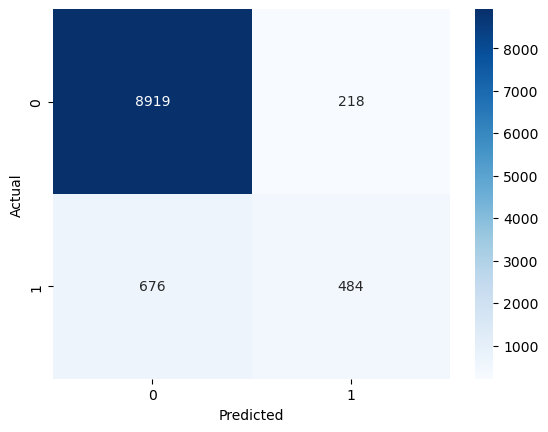

Evaluation Metrics for SMOTE Data:
Test Accuracy: 0.8694
Precision: 0.4590
Recall: 0.8922
F1 Score: 0.6061
Confusion Matrix:
[[7917 1220]
 [ 125 1035]]
Classification Report for SMOTE data:
               precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      9137
         1.0       0.46      0.89      0.61      1160

    accuracy                           0.87     10297
   macro avg       0.72      0.88      0.76     10297
weighted avg       0.93      0.87      0.89     10297

Confusion Matrix for SMOTE data:
 [[7917 1220]
 [ 125 1035]]


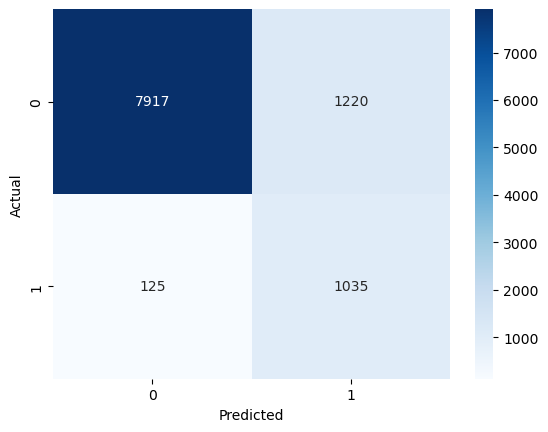

True Positives (TP),  predicted as subscribe, identified correctly: 7917
False Positives (FP), predicted as subscribe, identified uncorrectly:125
True Negatives (TN): predicted subscribe, identified correctly:     1035
False Negatives (FN):predicted subscribe, identified uncorrectly:   1220


In [57]:
# Now we want to train our model with respect to our best features which is shown above

def train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test): 
    
    logreg = LogisticRegression(random_state=42)   #initialize logistic regression
    logreg.fit(X_train_scaled, y_train)           # fit logistic regression on  non-smote train data
    y_pred = logreg.predict(X_test_scaled)
    
    # #####################################################Evaluate the non-SMOTE model ############################################################
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display evaluation metrics for non-SMOTE data
    print("Evaluation Metrics for Non-SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
        
    
    print("Classification Report for Non-SMOTE data:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Non-SMOTE data:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    ###################################################### Evaluate on SMOTE data ##################################################################
    
    
    logreg.fit(X_train_smote, y_train_smote)     # fit logistic regression on SMOTE train data
    y_pred_smote = logreg.predict(X_test_scaled)
    
     # Evaluate the SMOTE model
    accuracy = accuracy_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
    
    # Display evaluation metrics for SMOTE data
    print("Evaluation Metrics for SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix_smote}')
        
    
    print("Classification Report for SMOTE data:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix for SMOTE data:\n", confusion_matrix(y_test, y_pred_smote))

   
    cm = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #cm is a 2x2 matrix for a binary classification: [[TN, FP], [FN, TP]]
    TP = cm[0][0] 
    FN = cm[0][1] 
    FP = cm[1][0] 
    TN = cm[1][1]
    
    #Printing the confusion matrix and individual components 
    print(f"True Positives (TP),  predicted as subscribe, identified correctly: {TP}") 
    print(f"False Positives (FP), predicted as subscribe, identified uncorrectly:{FP}") 
    print(f"True Negatives (TN): predicted subscribe, identified correctly:     {TN}") 
    print(f"False Negatives (FN):predicted subscribe, identified uncorrectly:   {FN}")



print('predictions with Logistic Regression model:')
train_predict_evaluate(X_train_scaled, X_train_smote, y_train, y_train_smote, X_test_scaled, y_test)
    


predictions with Gradient Boosting model:
Evaluation Metrics for Non-SMOTE Data:
Test Accuracy: 0.9173
Precision: 0.6711
Recall: 0.5207
F1 Score: 0.5864
Confusion Matrix:
[[8841  296]
 [ 556  604]]
Classification Report for Non-SMOTE data:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      9137
         1.0       0.67      0.52      0.59      1160

    accuracy                           0.92     10297
   macro avg       0.81      0.74      0.77     10297
weighted avg       0.91      0.92      0.91     10297

Confusion Matrix for Non-SMOTE data:
 [[8841  296]
 [ 556  604]]


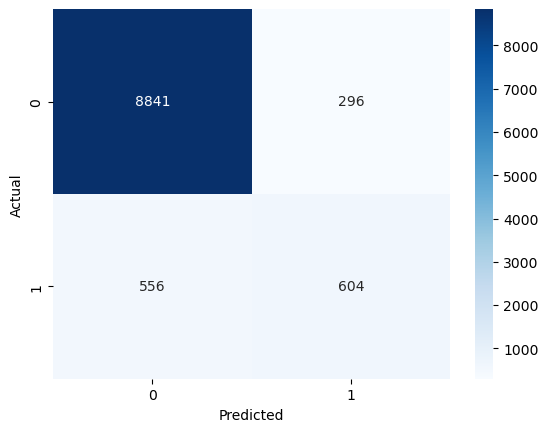

Evaluation Metrics for SMOTE Data:
Test Accuracy: 0.8952
Precision: 0.5222
Recall: 0.8224
F1 Score: 0.6388
Confusion Matrix:
[[8264  873]
 [ 206  954]]
Classification Report for SMOTE data:
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      9137
         1.0       0.52      0.82      0.64      1160

    accuracy                           0.90     10297
   macro avg       0.75      0.86      0.79     10297
weighted avg       0.92      0.90      0.90     10297

Confusion Matrix for SMOTE data:
 [[8264  873]
 [ 206  954]]


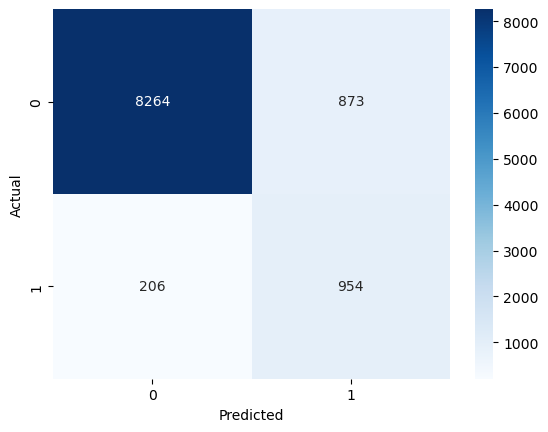

True Positives (TP),  predicted as subscribe, identified correctly: 954
False Positives (FP), predicted as subscribe, identified uncorrectly:873
True Negatives (TN): predicted unsubscribe, identified correctly:    8264
False Negatives (FN):predicted unsubscribe, identified uncorrectly:  206


In [58]:
    
def train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test): 
    
    

    gb_model = GradientBoostingClassifier(random_state=42) # Initialize Gradient Boosting Classifier

    gb_model.fit(X_train_scaled, y_train)
    y_pred = gb_model.predict(X_test_scaled)
    ############################################### Evaluation on non smote data ##############################################
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display evaluation metrics for non-SMOTE data
    print("Evaluation Metrics for Non-SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')

    
    
    print("Classification Report for Non-SMOTE data:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Non-SMOTE data:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
        
################################################### evaluation on smote data ######################################################################
    
    gb_model.fit(X_train_smote, y_train_smote)
    y_pred_smote = gb_model.predict(X_test_scaled)
     # Evaluate the SMOTE model
    accuracy = accuracy_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
    
    # Display evaluation metrics for SMOTE data
    print("Evaluation Metrics for SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix_smote}')
        
    
    
    print("Classification Report for SMOTE data:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix for SMOTE data:\n", confusion_matrix(y_test, y_pred_smote))
    
    cm = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #cm is a 2x2 matrix for a binary classification: [[TN, FP], [FN, TP]] 
    TN = cm[0][0] 
    FP = cm[0][1] 
    FN = cm[1][0] 
    TP = cm[1][1]
    
    #Printing the confusion matrix and individual components 
    print(f"True Positives (TP),  predicted as subscribe, identified correctly: {TP}") 
    print(f"False Positives (FP), predicted as subscribe, identified uncorrectly:{FP}") 
    print(f"True Negatives (TN): predicted unsubscribe, identified correctly:    {TN}") 
    print(f"False Negatives (FN):predicted unsubscribe, identified uncorrectly:  {FN}")




print('predictions with Gradient Boosting model:')
train_predict_evaluate(X_train_scaled, X_train_smote, y_train, y_train_smote, X_test_scaled, y_test)
    


predictions with Adaboost Classifier:


C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation Metrics for Non-SMOTE Data:
Test Accuracy: 0.9100
Precision: 0.6662
Recall: 0.4026
F1 Score: 0.5019
Confusion Matrix:
[[8903  234]
 [ 693  467]]
Classification Report for Non-SMOTE data:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      9137
         1.0       0.67      0.40      0.50      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.69      0.73     10297
weighted avg       0.90      0.91      0.90     10297

Confusion Matrix for Non-SMOTE data:
 [[8903  234]
 [ 693  467]]


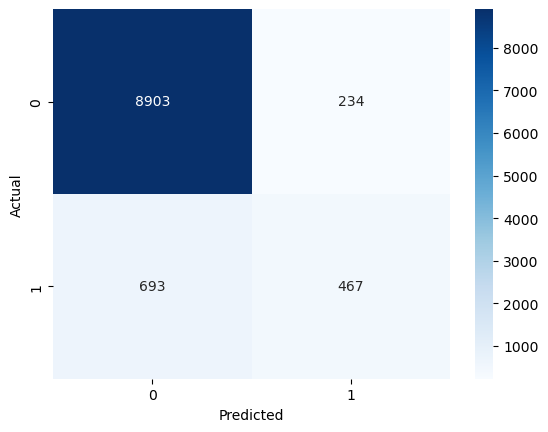

C:\Users\Zohre\anaconda3.09\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluation Metrics for SMOTE Data:
Test Accuracy: 0.9024
Precision: 0.5501
Recall: 0.7336
F1 Score: 0.6287
Confusion Matrix:
[[8441  696]
 [ 309  851]]
Classification Report for SMOTE data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      9137
         1.0       0.55      0.73      0.63      1160

    accuracy                           0.90     10297
   macro avg       0.76      0.83      0.79     10297
weighted avg       0.92      0.90      0.91     10297

Confusion Matrix for SMOTE data:
 [[8441  696]
 [ 309  851]]


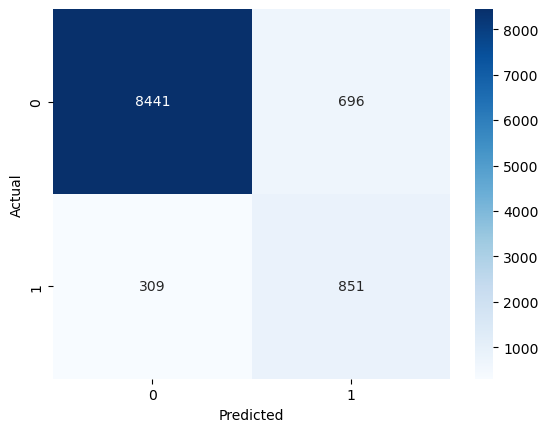

True Positives (TP),  predicted as subscribe, identified correctly: 851
False Positives (FP), predicted as subscribe, identified uncorrectly:696
True Negatives (TN): predicted unsubscribe, identified correctly:    8441
False Negatives (FN):predicted unsubscribe, identified uncorrectly:  309


In [59]:
def train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test): 

    #Initialize the base classifier, here a simple Decision Tree 
    base_cls = DecisionTreeClassifier(max_depth=1)
    
    # Initialize AdaBoost Classifier 
    adaboost_cls = AdaBoostClassifier(estimator=base_cls, n_estimators=100, random_state=42) 

    adaboost_cls.fit(X_train_scaled, y_train)
    y_pred = adaboost_cls.predict(X_test_scaled)
    
    ############################################## evaluation on non smote data ################################################################
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display evaluation metrics for non-SMOTE data
    print("Evaluation Metrics for Non-SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')

    
    
    print("Classification Report for Non-SMOTE data:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Non-SMOTE data:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    ########################################################## evaluation on smote data###########################################################
    
    
    adaboost_cls.fit(X_train_smote, y_train_smote)
    y_pred_smote = adaboost_cls.predict(X_test_scaled)
     # Evaluate the SMOTE model
    accuracy = accuracy_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
    
    # Display evaluation metrics for SMOTE data
    print("Evaluation Metrics for SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix_smote}')
        
    
    print("Classification Report for SMOTE data:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix for SMOTE data:\n", confusion_matrix(y_test, y_pred_smote))
    
    cm = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

   #cm is a 2x2 matrix for a binary classification: [[TN, FP], [FN, TP]] 
    TN = cm[0][0] 
    FP = cm[0][1] 
    FN = cm[1][0] 
    TP = cm[1][1]
    
    #Printing the confusion matrix and individual components 
    print(f"True Positives (TP),  predicted as subscribe, identified correctly: {TP}") 
    print(f"False Positives (FP), predicted as subscribe, identified uncorrectly:{FP}") 
    print(f"True Negatives (TN): predicted unsubscribe, identified correctly:    {TN}") 
    print(f"False Negatives (FN):predicted unsubscribe, identified uncorrectly:  {FN}")



print('predictions with Adaboost Classifier:')
train_predict_evaluate(X_train_scaled, X_train_smote, y_train, y_train_smote, X_test_scaled, y_test)
    


predictions with RandomForest Classifier:
Evaluation Metrics for Non-SMOTE Data:
Test Accuracy: 0.9165
Precision: 0.6825
Recall: 0.4836
F1 Score: 0.5661
Confusion Matrix:
[[8876  261]
 [ 599  561]]
Classification Report for Non-SMOTE data:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      9137
         1.0       0.68      0.48      0.57      1160

    accuracy                           0.92     10297
   macro avg       0.81      0.73      0.76     10297
weighted avg       0.91      0.92      0.91     10297

Confusion Matrix for Non-SMOTE data:
 [[8876  261]
 [ 599  561]]


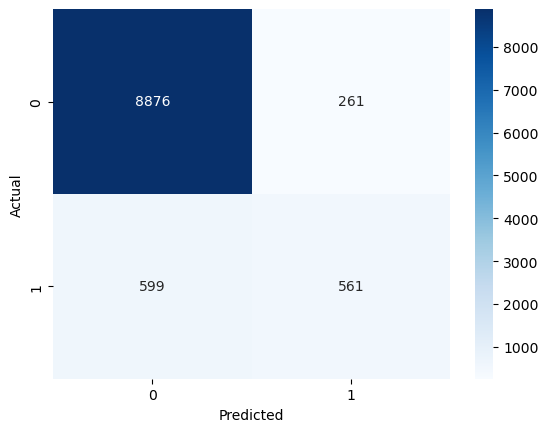

Evaluation Metrics for SMOTE Data:
Test Accuracy: 0.9066
Precision: 0.5672
Recall: 0.7207
F1 Score: 0.6348
Confusion Matrix:
[[8499  638]
 [ 324  836]]
Classification Report for SMOTE data:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      9137
         1.0       0.57      0.72      0.63      1160

    accuracy                           0.91     10297
   macro avg       0.77      0.83      0.79     10297
weighted avg       0.92      0.91      0.91     10297

Confusion Matrix for SMOTE data:
 [[8499  638]
 [ 324  836]]


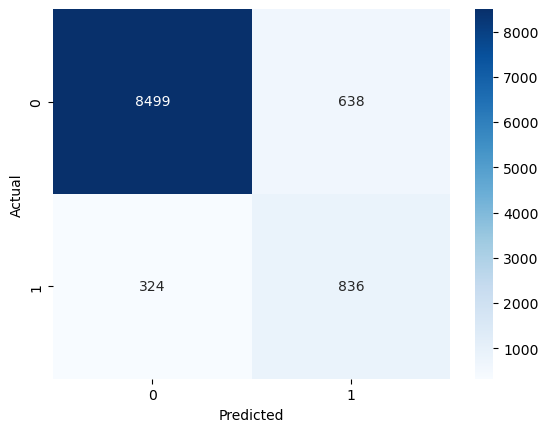

True Positives (TP),  predicted as subscribe, identified correctly: 836
False Positives (FP), predicted as subscribe, identified uncorrectly:638
True Negatives (TN): predicted unsubscribe, identified correctly:    8499
False Negatives (FN):predicted unsubscribe, identified uncorrectly:  324


In [60]:
def train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test):
    
    # Initialize randomforest Classifier and set the parameters based on hyper parametr tuning at the end
    rf_model = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=200,random_state = 42)   
    rf_model.fit(X_train_scaled, y_train)
    
    y_pred = rf_model.predict(X_test_scaled)
    ################################################# evaluation on non smote data #############################################################
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display evaluation metrics for non-SMOTE data
    print("Evaluation Metrics for Non-SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    
    print("Classification Report for Non-SMOTE data:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Non-SMOTE data:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    ###################################################### evaluation on smote data ####################################################################
    
    
    rf_model.fit(X_train_smote, y_train_smote)
    y_pred_smote = rf_model.predict(X_test_scaled)
     # Evaluate the SMOTE model
    accuracy = accuracy_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
    
    # Display evaluation metrics for SMOTE data
    print("Evaluation Metrics for SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix_smote}')
    print("Classification Report for SMOTE data:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix for SMOTE data:\n", confusion_matrix(y_test, y_pred_smote))
    
    cm = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #cm is a 2x2 matrix for a binary classification: [[TN, FP], [FN, TP]] 
    TN = cm[0][0] 
    FP = cm[0][1] 
    FN = cm[1][0] 
    TP = cm[1][1]
    
    #Printing the confusion matrix and individual components 
    print(f"True Positives (TP),  predicted as subscribe, identified correctly: {TP}") 
    print(f"False Positives (FP), predicted as subscribe, identified uncorrectly:{FP}") 
    print(f"True Negatives (TN): predicted unsubscribe, identified correctly:    {TN}") 
    print(f"False Negatives (FN):predicted unsubscribe, identified uncorrectly:  {FN}")




print('predictions with RandomForest Classifier:')
train_predict_evaluate(X_train_scaled, X_train_smote, y_train, y_train_smote, X_test_scaled, y_test)
    


predictions with XGBoost Classifier:


C:\Users\Zohre\anaconda3.09\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation Metrics for Non-SMOTE Data:
Test Accuracy: 0.9077
Precision: 0.6027
Recall: 0.5310
F1 Score: 0.5646
Confusion Matrix:
[[8731  406]
 [ 544  616]]
Classification Report for Non-SMOTE data:
               precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      9137
         1.0       0.60      0.53      0.56      1160

    accuracy                           0.91     10297
   macro avg       0.77      0.74      0.76     10297
weighted avg       0.90      0.91      0.91     10297

Confusion Matrix for Non-SMOTE data:
 [[8731  406]
 [ 544  616]]


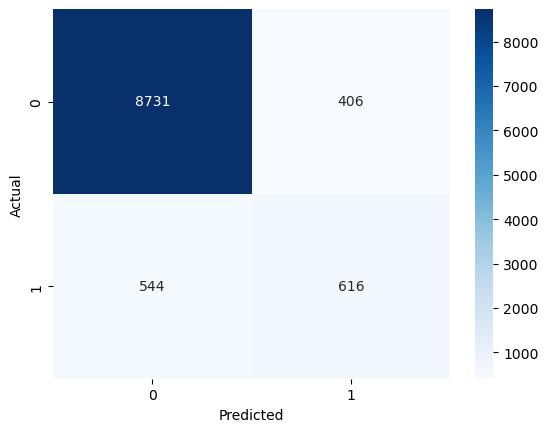

C:\Users\Zohre\anaconda3.09\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Evaluation Metrics for SMOTE Data:
Test Accuracy: 0.9090
Precision: 0.5970
Recall: 0.5914
F1 Score: 0.5942
Confusion Matrix:
[[8674  463]
 [ 474  686]]
Classification Report for SMOTE data:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      9137
         1.0       0.60      0.59      0.59      1160

    accuracy                           0.91     10297
   macro avg       0.77      0.77      0.77     10297
weighted avg       0.91      0.91      0.91     10297

Confusion Matrix for SMOTE data:
 [[8674  463]
 [ 474  686]]


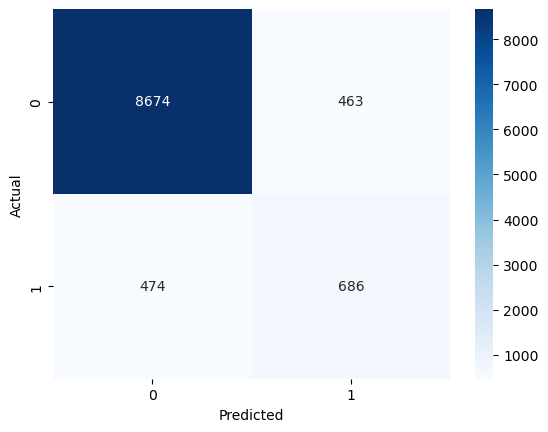

True Positives (TP),  predicted as subscribe, identified correctly: 8674
False Positives (FP), predicted as subscribe, identified uncorrectly: 474
True Negatives (TN): predicted unsubscribe, identified correctly:     686
False Negatives (FN):predicted unsubscribe, identified uncorrectly:   463


In [27]:
def train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test): 
    
    # initialize XGBoost Classifier and set the parameters based on hyper parametr tuning at the end
    xgbmodel = XGBClassifier(learning_rate= 0.1, max_depth=5, n_estimators= 200, random_state=42)
    xgbmodel.fit(X_train_scaled, y_train)  # fit xgbmodel on train data
    y_pred = xgbmodel.predict(X_test_scaled)   
    ########################################## evaluation on non smote data ####################################################################
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display evaluation metrics for non-SMOTE data
    print("Evaluation Metrics for Non-SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    
    print("Classification Report for Non-SMOTE data:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Non-SMOTE data:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    ##################################################### evaluation on smote data ########################################################
    
    xgbmodel.fit(X_train_smote, y_train_smote)
    y_pred_smote = xgbmodel.predict(X_test_scaled)
     # Evaluate the SMOTE model
    accuracy = accuracy_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
    
    print("Evaluation Metrics for SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix_smote}')
    print("Classification Report for SMOTE data:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix for SMOTE data:\n", confusion_matrix(y_test, y_pred_smote))
    
    cm = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #cm is a 2x2 matrix for a binary classification: [[TN, FP], [FN, TP]] 
    TN = cm[0][0] 
    FP = cm[0][1] 
    FN = cm[1][0] 
    TP = cm[1][1]
    
    #Printing the confusion matrix and individual components 
    print(f"True Positives (TP),  predicted as subscribe, identified correctly: {TP}") 
    print(f"False Positives (FP), predicted as subscribe, identified uncorrectly:{FP}") 
    print(f"True Negatives (TN): predicted unsubscribe, identified correctly:    {TN}") 
    print(f"False Negatives (FN):predicted unsubscribe, identified uncorrectly:  {FN}")




print('predictions with XGBoost Classifier:')
train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test)



predictions with SVM Classifier:
Evaluation Metrics for Non-SMOTE Data:
Test Accuracy: 0.9046
Precision: 0.6732
Recall: 0.2983
F1 Score: 0.4134
Confusion Matrix:
[[8969  168]
 [ 814  346]]
Classification Report for Non-SMOTE data:
               precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      9137
         1.0       0.67      0.30      0.41      1160

    accuracy                           0.90     10297
   macro avg       0.79      0.64      0.68     10297
weighted avg       0.89      0.90      0.89     10297

Confusion Matrix for Non-SMOTE data:
 [[8969  168]
 [ 814  346]]


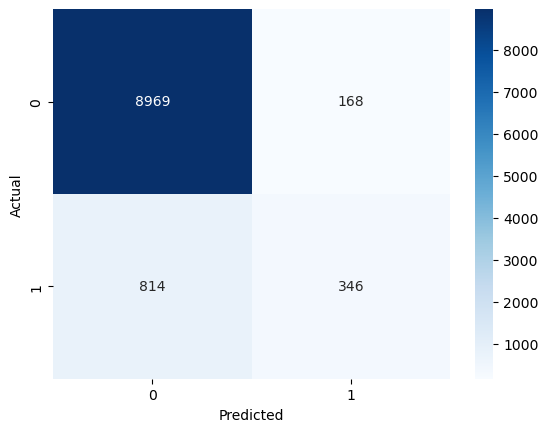

Evaluation Metrics for SMOTE Data:
Test Accuracy: 0.8536
Precision: 0.4299
Recall: 0.9172
F1 Score: 0.5854
Confusion Matrix:
[[7726 1411]
 [  96 1064]]
Classification Report for SMOTE data:
               precision    recall  f1-score   support

         0.0       0.99      0.85      0.91      9137
         1.0       0.43      0.92      0.59      1160

    accuracy                           0.85     10297
   macro avg       0.71      0.88      0.75     10297
weighted avg       0.92      0.85      0.87     10297

Confusion Matrix for SMOTE data:
 [[7726 1411]
 [  96 1064]]


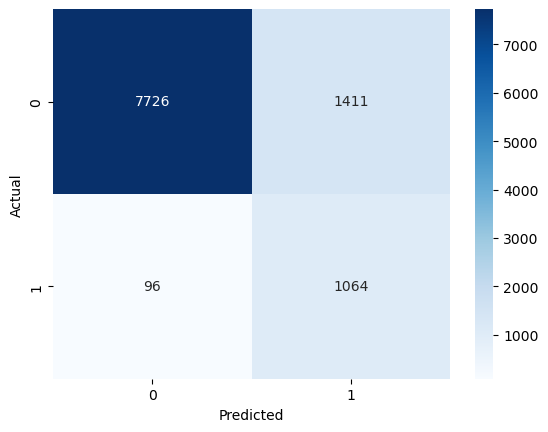

True Positives (TP),  predicted as subscribe, identified correctly: 7726
False Positives (FP), predicted as subscribe, identified uncorrectly: 96
True Negatives (TN): predicted unsubscribe, identified correctly:     1064
False Negatives (FN):predicted unsubscribe, identified uncorrectly:   1411


In [30]:
def train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test):
    
    svm = SVC(kernel='linear', C=1.0, tol=0.001)  

    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)
    ################################################ evaluation on non smote data ######################################################
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Display evaluation metrics for non-SMOTE data
    print("Evaluation Metrics for Non-SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    
    print("Classification Report for Non-SMOTE data:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix for Non-SMOTE data:\n", confusion_matrix(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    ##################################################### evaluation on smote data ###############################################################
    
        # Display evaluation metrics for SMOTE data

    svm.fit(X_train_smote, y_train_smote)
    y_pred_smote = svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_smote)
    precision = precision_score(y_test, y_pred_smote)
    recall = recall_score(y_test, y_pred_smote)
    f1 = f1_score(y_test, y_pred_smote)
    conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
    
    print("Evaluation Metrics for SMOTE Data:")
    print(f'Test Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Confusion Matrix:\n{conf_matrix_smote}')
    print("Classification Report for SMOTE data:\n", classification_report(y_test, y_pred_smote))
    print("Confusion Matrix for SMOTE data:\n", confusion_matrix(y_test, y_pred_smote))
    
    cm = confusion_matrix(y_test, y_pred_smote)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #cm is a 2x2 matrix for a binary classification: [[TN, FP], [FN, TP]] 
    TN = cm[0][0] 
    FP = cm[0][1] 
    FN = cm[1][0] 
    TP = cm[1][1]
    
    #Printing the confusion matrix and individual components 
    print(f"True Positives (TP),  predicted as subscribe, identified correctly: {TP}") 
    print(f"False Positives (FP), predicted as subscribe, identified uncorrectly:{FP}") 
    print(f"True Negatives (TN): predicted unsubscribe, identified correctly:    {TN}") 
    print(f"False Negatives (FN):predicted unsubscribe, identified uncorrectly:  {FN}")



print('predictions with SVM Classifier:')
train_predict_evaluate(X_train_scaled, X_train_smote,y_train, y_train_smote, X_test_scaled, y_test)



## Bar Plot for Comparison Between Different Metrics on SMOTE and NON-SMOTE data

After training our models on both balanced (SMOTE) and imbalanced datasets, we aimed to compare their performance metrics visually with Bar Plot. We observed significant differences between the two sets of results.
By comparing the metrics obtained from both models, we were able to assess the impact of class imbalance on model performance and evaluate the effectiveness of the SMOTE technique in improving classification results.

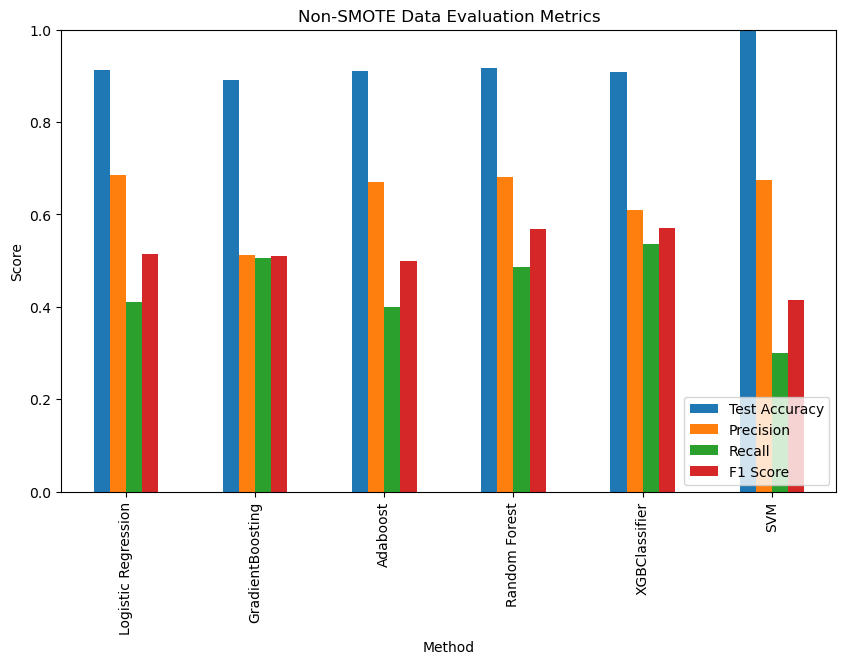

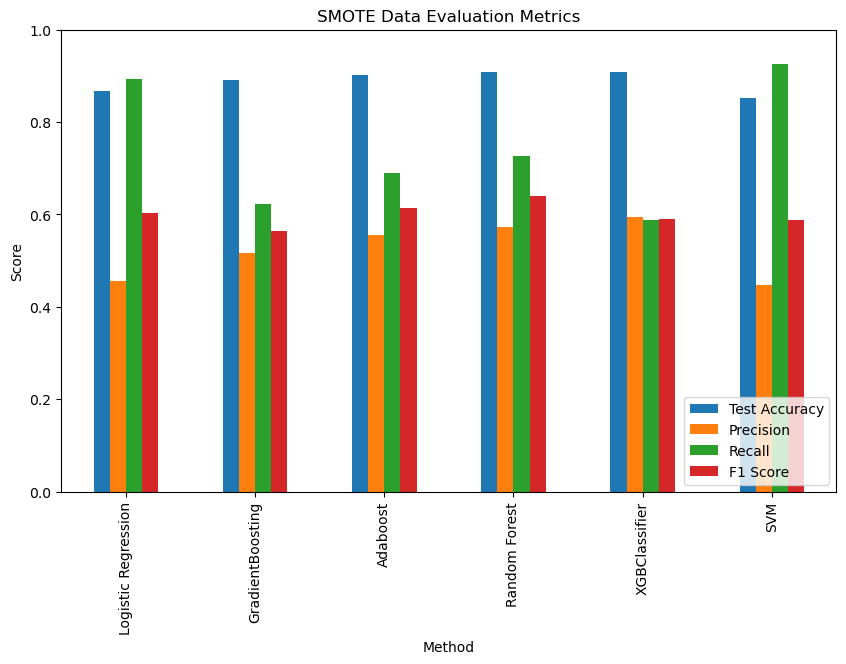

In [61]:
# define bar plot function to draw bar plot to compare different evaluation metrics for both non smote and smote data
def bar_plot():

    
    # Data for Non-SMOTE Data
    non_smote_data = {
    'Method': ['Logistic Regression', 'GradientBoosting', 'Adaboost', 'Random Forest', 'XGBClassifier', 'SVM'],
    'Test Accuracy': [0.9124, 0.8902, 0.9103, 0.9166, 0.9089, 9049],
    'Precision': [0.6853, 0.5127, 0.6705, 0.6805, 0.6086, 0.6738],
    'Recall': [0.4112, 0.5052, 0.4, 0.4871, 0.5362, 0.2991],
    'F1 Score': [0.5140, 0.5089, 0.50, 0.5681, 0.5701, 0.4143],
    }

    
    # Data for SMOTE Data
    smote_data = {
    'Method': ['Logistic Regression', 'GradientBoosting', 'Adaboost', 'Random Forest', 'XGBClassifier', 'SVM'],
    'Test Accuracy': [0.8677, 0.8917, 0.9026, 0.9081, 0.9082, 0.8524],
    'Precision': [0.4556, 0.5161, 0.5544, 0.5728, 0.5937, 0.4482],
    'Recall': [0.8931, 0.6224, 0.6897, 0.7259, 0.5871,0.9259 ],
    'F1 Score': [0.6034, 0.5643, 0.6147, 0.6403, 0.5904, 0.5874],
    }

    
    # Create DataFrames
    non_smote_df = pd.DataFrame(non_smote_data)
    smote_df = pd.DataFrame(smote_data)

    
    # Plotting Non-SMOTE Data
    fig, ax = plt.subplots(figsize=(10, 6))
    non_smote_df.plot(kind='bar', x='Method', y=['Test Accuracy', 'Precision', 'Recall', 'F1 Score'], ax=ax)
    plt.title('Non-SMOTE Data Evaluation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.show()

    
    # Plotting SMOTE Data
    fig, ax = plt.subplots(figsize=(10, 6))
    smote_df.plot(kind='bar', x='Method', y=['Test Accuracy', 'Precision', 'Recall', 'F1 Score'], ax=ax)
    plt.title('SMOTE Data Evaluation Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.show()
    
bar_plot()


**Comparison:**

- accuracy is higher in imbalanced data compared to balanced data. However, it's worth noting that accuracy alone might not be a sufficient metric,
especially for imbalanced datasets.

- Non-SMOTE Data:
  
we observed that almost in all models: The recall is relatively low, indicating that the model may miss subscription cases. 
The F1-score, which balances precision and recall, is also lower for class 1.

- SMOTE Data:
  
we observed that almost all models, shows improvement in  and f1score and recall for class 1, meaning the model is better at capturing subscription case, However, precision for class 1 is significantly lower, indicating a higher rate of false positives.



- Precision:
Random Forest (0.57) and XGBoost Classifier (0.60) perform better in precision, indicating their ability to correctly identify positive cases.

- Recall:
  
SVM (0.92) has the highest recall, indicating its ability to capture the majority of positive cases. However, Random Forest (0.73) also performs well in this metric.

- F1 score:
  
Random Forest and AdaBoost achieves the highest F1 score (0.63), which balances precision and recall. XGBoost Classifier (0.59) also perform well 
in this metric.

- Accuracy:
Random Forest and XGBoost Classifier both achieve an accuracy of 0.91, indicating their overall predictive performance.




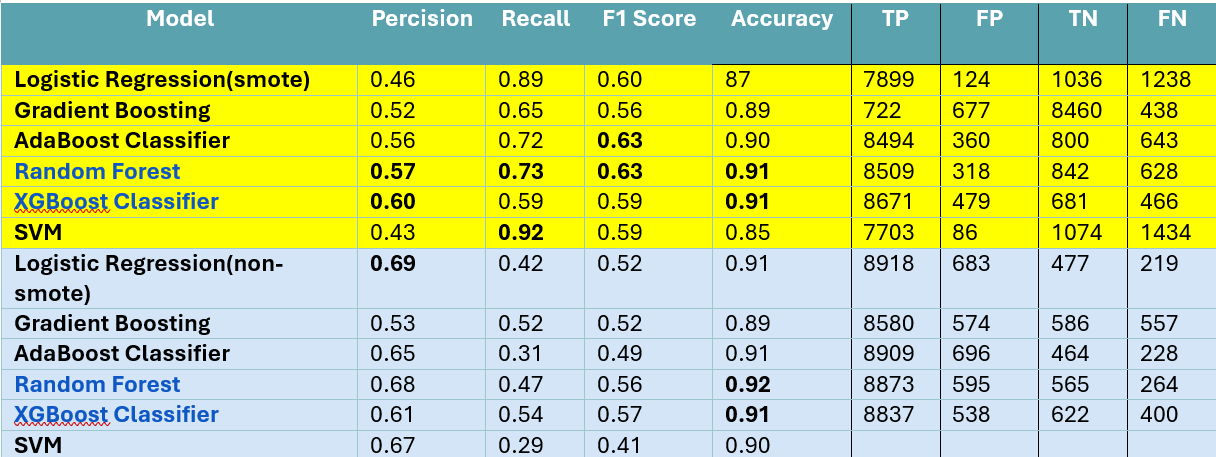



## Observation from evaluation
  

- Precision: Random Forest (0.57) and XGBoost Classifier (0.60) perform better in precision, indicating their ability to correctly identify positive cases
- Recall: SVM (0.92) has the highest recall, indicating its ability to capture the majority of positive cases. However, Random Forest (0.73) also performs well in this metric.
- F1 score: Random Forest and AdaBoost achieves the highest F1 score (0.63), which balances precision and recall. XGBoost Classifier (0.59) also perform well in this metric.
- Accuracy: Random Forest and XGBoost Classifier both achieve an accuracy of 0.91, indicating their overall predictive performance.
Considering these metrics, Random Forest emerges as the top-performing model, excelling in precision, recall, F1 score, and accuracy. However, depending on the specific requirements of the application, other models such as XGBoost Classifier and AdaBoost Classifier also demonstrate competitive performance and may be suitable alternatives.


- Considering these metrics, Random Forest emerges as the top-performing model, excelling in precision, recall, F1 score, and accuracy.
However, depending on the specific requirements of the application, other models such as XGBoost Classifier and AdaBoost Classifier also 
demonstrate competitive performance and may be suitable alternatives.


- Best model for hyper parameter tuning and ROC curve are:


- **Random Forest**
- **XGBoostClassifier**

- Hyper Parameter Tuning for XGBoost model, and RandomForest Classifier,since have the highest F1-score :

- ROC Curve (Receiver Operating Characteristic): The ROC curve tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The X-axis is represented by False positive rates (Specificity) and the Y-axis is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes


##  ROC Curve for Random Forest

Fitting 3 folds for each of 8 candidates, totalling 24 fits
best parametrs are :{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


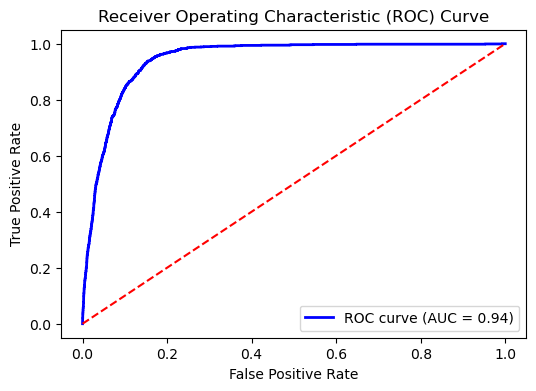

In [62]:
# Random Forest with hyper parameter tuning
from sklearn.metrics import roc_curve

def grid_search_rf(X_train, y_train, X_test):
    
    param_grid = {                             # define param_grid for gridsearchcv
    'n_estimators': [ 100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
    
    }
    
    grf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='roc_auc', refit=True, cv=3, verbose=1) #initialize grid searchcv
    grf.fit(X_train, y_train)   # fit grf on train data
    
    # Get the best estimator
    best_RF = grf.best_estimator_
    best_parameters = grf.best_params_
    print('best parametrs are :{}'.format(best_parameters))
    
    
    # Predict probabilities for the test set
    y_proba = best_RF.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class
    
    # Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
        

grid_search_rf(X_train_smote, y_train_smote, X_test_scaled)



##  ROC Curve for XGBoost Classifier

Fitting 3 folds for each of 8 candidates, totalling 24 fits
best parameters :{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


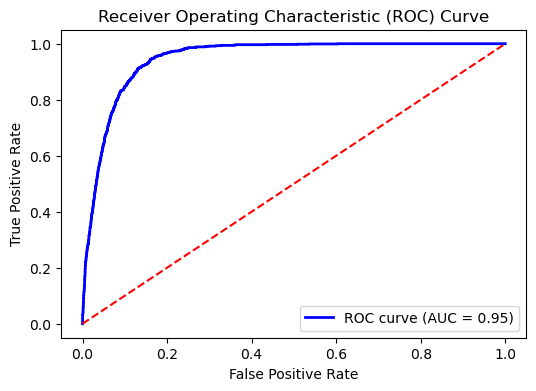

In [63]:
#XGBoost with hyper parameter tuning
from sklearn.metrics import roc_curve

    
def grid_search_xgb(X_train, y_train, X_test):
    
    param_grid = {                          # define param grid for grid searchcv
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    }
   
    
    xgb = GridSearchCV(XGBClassifier(), param_grid=param_grid, scoring='roc_auc', refit=True, cv=3, verbose=1) #initialise gridsearchcv
    xgb.fit(X_train, y_train)  # fit sgb on train data
    
    # Get the best estimator
    best_RF = xgb.best_estimator_
    best_parameters = xgb.best_params_
    print('best parameters :{}'.format(best_parameters))
    
    # Predict probabilities for the test set
    y_proba = best_RF.predict_proba(X_test)[:, 1]  # Select probabilities for the positive class
    
    # Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
        

grid_search_xgb(X_train_smote, y_train_smote, X_test_scaled)


## References

Tekouabou, S.C.K., Cherif, W., & Silkan, H. (2019, March). A data modeling approach for classification problems: application to bank telemarketing prediction. In Proceedings of the 2nd International Conference on Networking, Information Systems & Security (pp. 1-7).

Jin, W., & He, Y. (2019, April). Three data mining models to predict bank telemarketing. In IOP Conference Series: Materials Science and Engineering (Vol. 490, No. 6, p. 062075). IOP Publishing.

He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263-1284.


Sundus, K. I., Hammo, B. H., Al-Zoubi, M. B., & Al-Omari, A. (2022). Solving the multicollinearity problem to improve the stability of machine learning algorithms applied to a fully annotated breast cancer dataset. Informatics in Medicine Unlocked, 33, 101088.

Dong, X., Yu, Z., Cao, W., Shi, Y. and Ma, Q., 2020. A survey on ensemble learning. Frontiers of Computer Science, 14, pp.241-258.



